['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


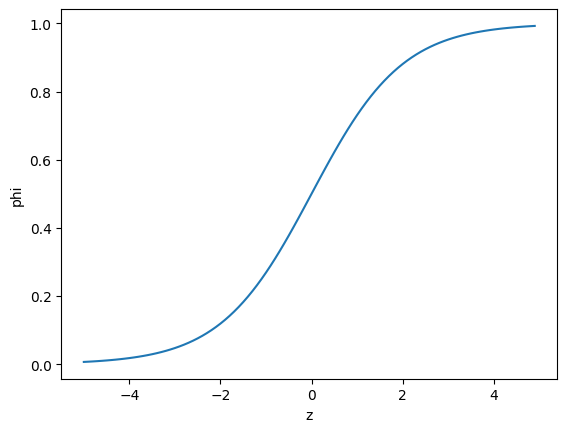

['A' 'C']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[1.00000000e+00 1.43563281e-20]
 [2.41846605e-05 9.99975815e-01]
 [1.00000000e+00 3.76077089e-17]
 [1.00000000e+00 4.87981634e-13]
 [1.00000000e+00 2.27882416e-20]]
['Bream' 'Smelt']
[[-0.07860343 -0.00431253 -0.00552308 -0.0031227  -0.00084375]] [11.33577955]
[-45.69009613  10.6297678  -37.81932262 -28.34849862 -45.22804227]
[1.43563281e-20 9.99975815e-01 3.76077089e-17 4.87981634e-13
 2.27882416e-20]
0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 처음 5개 데이터 보여줌
print(pd.unique(fish['Species'])) # Species열의 종류 보여줌 : Bream,Roach....

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 해당 열만 포함하도록 fish_input을 놓음.
print(fish_input[:5])

fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split # 테스트 케이스 분리
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler # 표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

print(kn.classes_) # 생선 문자열 : unique()와 달리 오름차순 정렬을 해서 준다.
print(kn.predict(test_scaled[:5])) # 초반 5개 결과 예측

import numpy as np # 초반 5개의 생선 각각의 확률을 구해준다.
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수 4번째자리까지

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes]) # [['Roach' 'Perch' 'Perch']]

# 로지스틱 회귀 (음수,매우 큰 양수값을 0~1로 나타내기 위해 시그모이드 함수 이용)
#1/(1+e^-z)
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1) # -5~5까지 0.1씩 커지게 만듬
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show() # 시그모이드 함수 시각화 : 0.5이하 = 음수, 0.5이상 = 양수

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]]) # A,C만 출력 : 불리언 인덱싱

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_input[bream_smelt_indexes] # 도미,빙어인 인덱스에서만 발췌해 train_input값을 train_bream_smelt에 넣기
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt) # 2진 분류를 위해 2개의 생선만 훈련시킴

print(lr.predict(train_bream_smelt[:5])) # 초반 5개 예측
print(lr.predict_proba(train_bream_smelt[:5])) # 초반 5개 도미,잉어일 각각의 확률
print(lr.classes_) # 도미, 빙어
print(lr.coef_,lr.intercept_) # 로지스틱 회귀 모델 계수, 상수항

decisions = lr.decision_function(train_bream_smelt[:5]) # 초반 5개의 z값
print(decisions)

from scipy.special import expit # 시그모이드 함수
print(expit(decisions)) # 시그모이드 함수 적용

# 로지스틱 회귀로 다중 분류 수행하기 : 여러z의 합인 소프트맥스 함수 사용
lr = LogisticRegression(C=20, max_iter=1000) # C는 규제 강도(alpha와 반대) 완화, max_iter은 최대 반복횟수 1000회
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.predict(test_scaled[:5])) # 초반 5개 예측
proba = lr.predict_proba(test_scaled[:5]) # 초반 5개 에측 확률
print(np.round(proba, decimals=3)) # 소수 3번째자리까지

print(lr.classes_) # 0,1,2,3,4
print(lr.coef_) # 7개의 행에 [-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797] 특성 5개의 계수가 있다. 이걸로 z값을 구할 수 있다.
print(lr.coef_.shape, lr.intercept_.shape) # (7,5) (7,) 7개의 생선을 사용하므로 행은 7개 5개의 특성을 사용하므로 열은 5개, z를 7번 계산함.

# 소프트맥스 함수 이용함. e_sum = ez1 + ez2 +... + ez7 각각의 확률 : sn = ezn / e_sum

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) # 소수 2번째자리까지

from scipy.special import softmax # softmax
proba = softmax(decision,axis=1)
print(np.round(proba, decimals=3)) # 소수 3번째자리까지

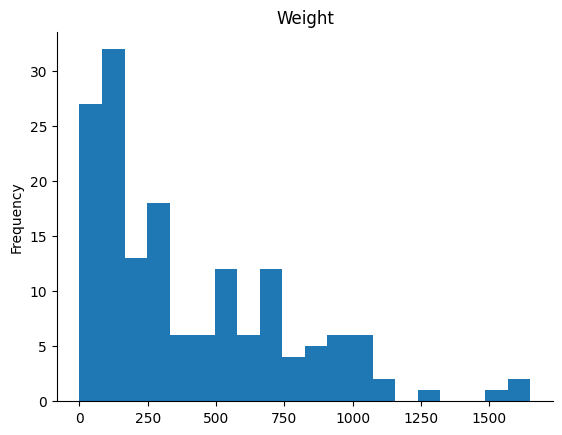

In [ ]:
# @title Weight

from matplotlib import pyplot as plt
fish['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)